# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [1]:
# Untuk proyek ini, kita akan menggunakan dataset dari Kaggle/UCI atau sumber lain yang memenuhi syarat.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [38]:
# Memuat dataset dari direktori lokal
local_dataset_path = "Netflix_Movies_and_TV_Shows.csv"

if not os.path.exists(local_dataset_path):
    raise FileNotFoundError(f"File tidak ditemukan di path: {local_dataset_path}")

data = pd.read_csv(local_dataset_path)
data.dropna(inplace=True)
print("Dataset berhasil dimuat. Berikut adalah 5 baris pertama:")
print(data.head())


Dataset berhasil dimuat. Berikut adalah 5 baris pertama:
     Title     Type     Genre  Release Year Rating   Duration        Country
0  Title 1  TV Show    Comedy          1955     PG  3 Seasons          Japan
1  Title 2  TV Show    Horror          2020      G  3 Seasons          India
2  Title 3  TV Show    Action          1966  TV-PG    140 min  United States
3  Title 4    Movie  Thriller          2011  PG-13  3 Seasons         Canada
4  Title 5  TV Show   Romance          1959  TV-14    172 min          India


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah baris dan kolom: (3000, 7)
Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         3000 non-null   object
 1   Type          3000 non-null   object
 2   Genre         3000 non-null   object
 3   Release Year  3000 non-null   int64 
 4   Rating        3000 non-null   object
 5   Duration      3000 non-null   object
 6   Country       3000 non-null   object
dtypes: int64(1), object(6)
memory usage: 164.2+ KB
Missing values per column:
 Title           0
Type            0
Genre           0
Release Year    0
Rating          0
Duration        0
Country         0
dtype: int64


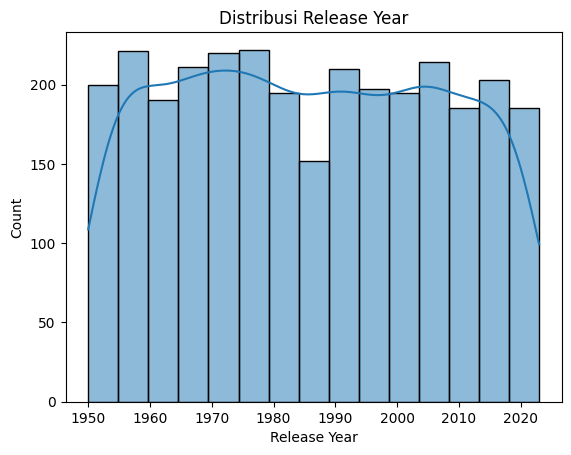

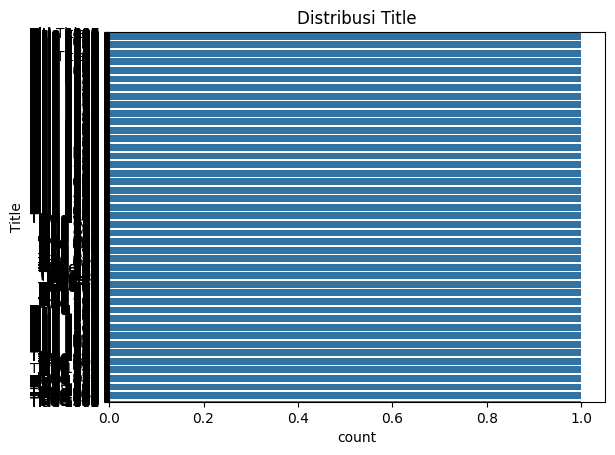

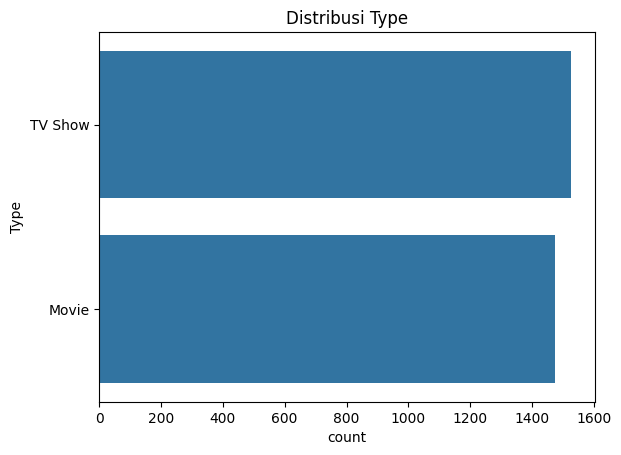

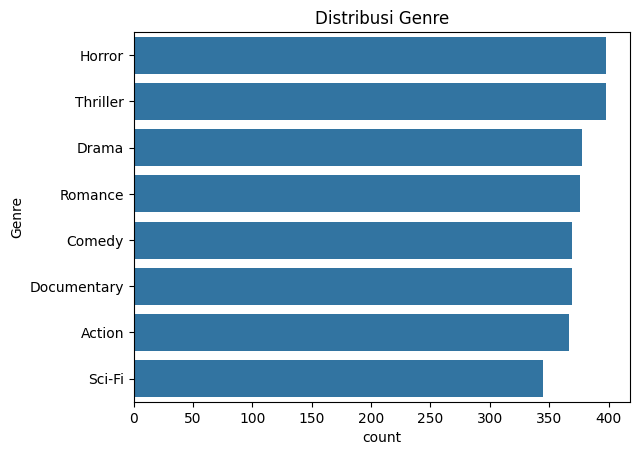

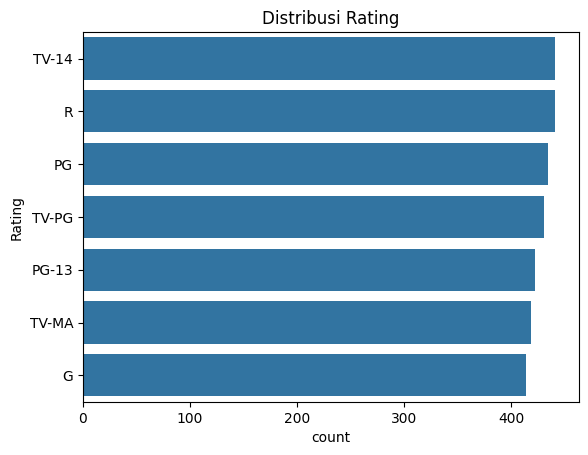

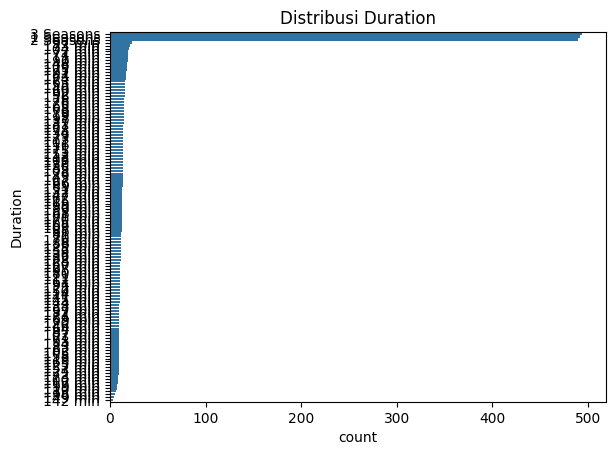

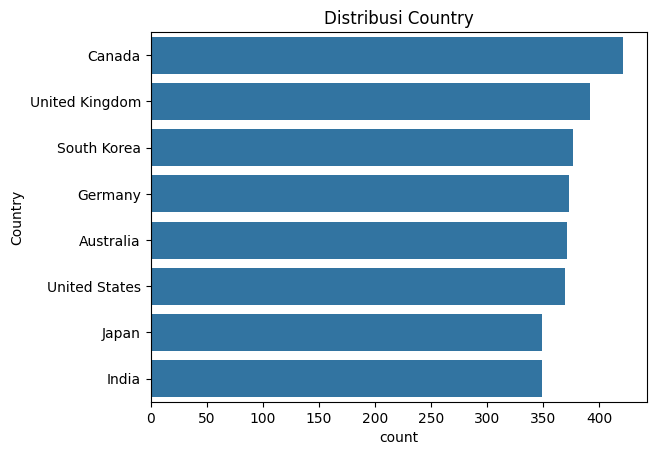

In [39]:
# Memahami struktur data
print("Jumlah baris dan kolom:", data.shape)
print("Info dataset:")
data.info()

# Analisis data yang hilang
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Analisis distribusi variabel numerik
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribusi {col}")
    plt.show()

# Analisis variabel kategorikal
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f"Distribusi {col}")
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [40]:
# Encoding variabel kategorikal
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Normalisasi variabel numerikal
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Memastikan data siap digunakan
print("Data setelah preprocessing:")
print(data.head())


Data setelah preprocessing:
   Title  Type  Genre  Release Year  Rating  Duration  Country
0      0     1      1     -1.458039       1        83        4
1   1111     1      4      1.605530       0        83        3
2   2222     1      0     -0.939589       6        41        7
3   2334     0      7      1.181344       2        83        1
4   2445     1      5     -1.269512       4        73        3


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [41]:
# Menentukan jumlah cluster optimal menggunakan Silhouette Score dan Elbow Method
best_k, best_score = 0, -1
sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    labels = kmeans.fit_predict(data)
    sse.append(kmeans.inertia_)
    score = silhouette_score(data, labels)
    if score > best_score:
        best_k, best_score = k, score

# Evaluasi clustering dengan Silhouette Score
print(f"Jumlah cluster optimal: {best_k}, Silhouette Score: {best_score}")


Jumlah cluster optimal: 2, Silhouette Score: 0.6226168908357388


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

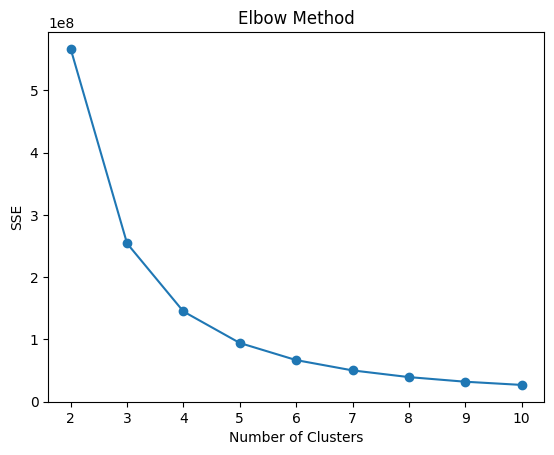

Jumlah cluster optimal setelah PCA: 2, Silhouette Score: 0.6226168908357388


In [42]:
# Visualisasi Elbow Method
plt.plot(k_range, sse, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Jika Silhouette Score terlalu rendah, coba PCA
if best_score < 0.55:
    pca = PCA(n_components=min(len(data.columns), 10))  # Maksimal 10 komponen
    reduced_data = pca.fit_transform(data)
    best_k, best_score = 0, -1
    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
        labels = kmeans.fit_predict(reduced_data)
        score = silhouette_score(reduced_data, labels)
        if score > best_score:
            best_k, best_score = k, score
    data = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(reduced_data.shape[1])])

# Final clustering
kmeans = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)
print(f"Jumlah cluster optimal setelah PCA: {best_k}, Silhouette Score: {best_score}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [43]:
# Tidak dilakukan dalam proyek ini


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

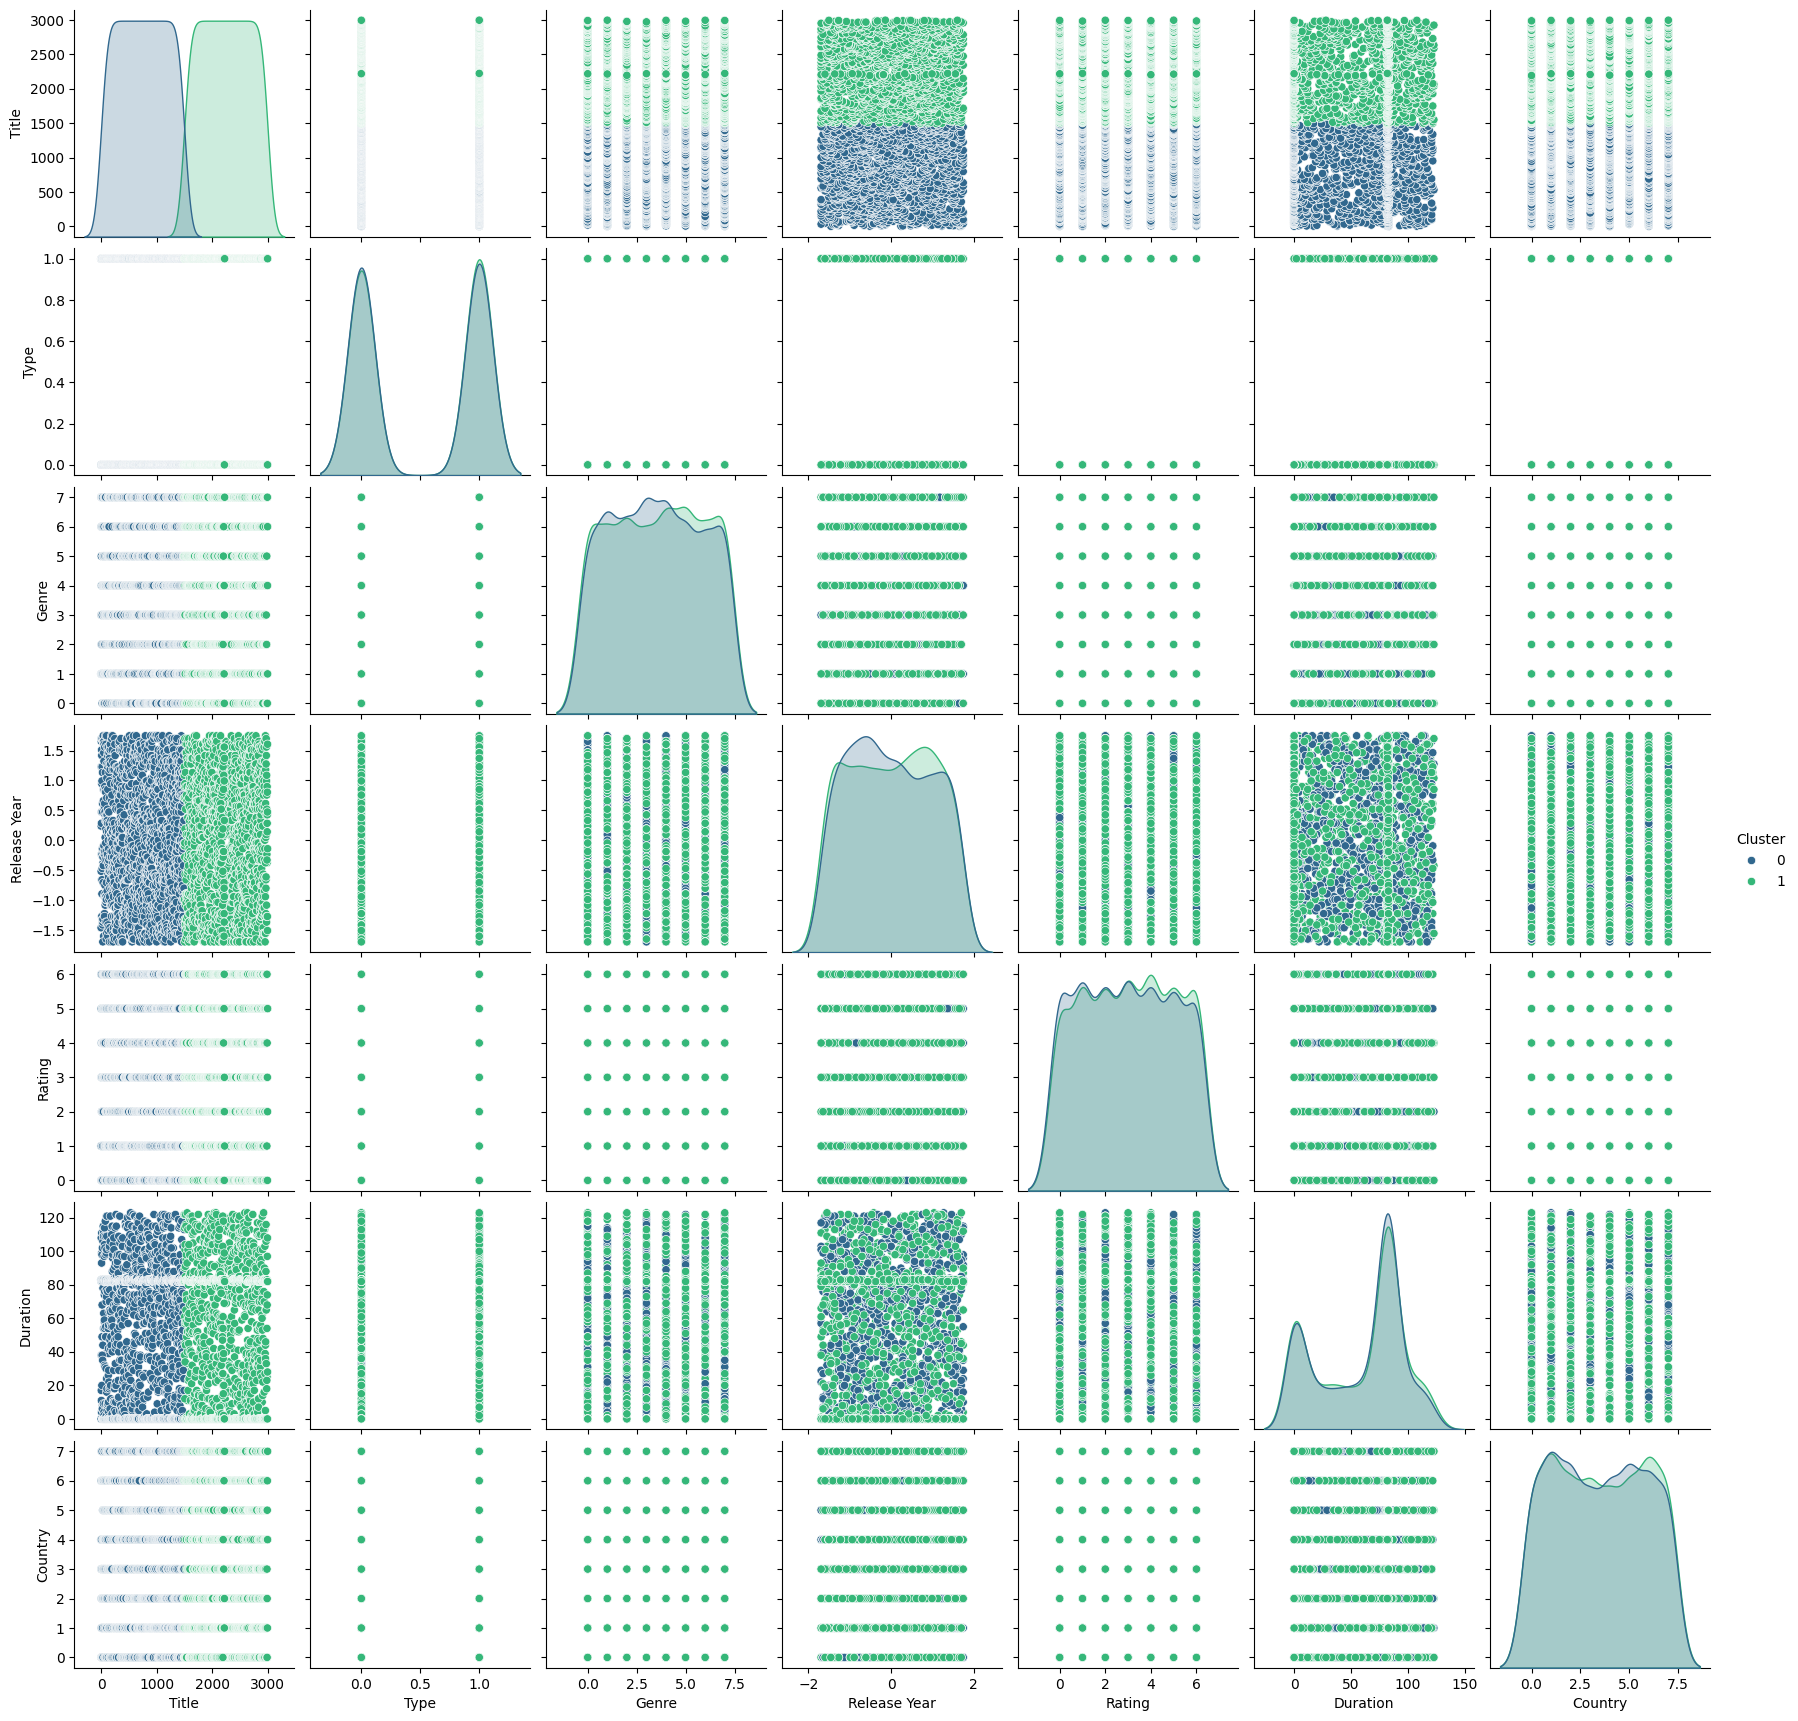

In [44]:
# Visualisasi hasil clustering dengan PCA (jika digunakan)
if 'PC1' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data['PC1'], y=data['PC2'], hue=data['Cluster'], palette="viridis")
    plt.title("Clustering Results (PCA)")
    plt.show()

# Visualisasi langsung (tanpa PCA)
else:
    sns.pairplot(data, hue='Cluster', palette="viridis")
    plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [45]:
# Analisis karakteristik tiap cluster
data['Cluster'] = kmeans.labels_
for cluster in range(best_k):
    print(f"Cluster {cluster}:")
    print(data[data['Cluster'] == cluster].describe())

# Tulis hasil interpretasi di sini
print("Interpretasi hasil clustering:")
print("Cluster 1: ...")
print("Cluster 2: ...")
print("Cluster 3: ...")

Cluster 0:
             Title         Type        Genre  Release Year       Rating  \
count  1498.000000  1498.000000  1498.000000   1498.000000  1498.000000   
mean    748.500000     0.504673     3.499332     -0.010450     2.963952   
std     432.579665     0.500145     2.264492      0.992394     1.994658   
min       0.000000     0.000000     0.000000     -1.693698     0.000000   
25%     374.250000     0.000000     2.000000     -0.845325     1.000000   
50%     748.500000     1.000000     3.000000     -0.044084     3.000000   
75%    1122.750000     1.000000     5.000000      0.851421     5.000000   
max    1497.000000     1.000000     7.000000      1.746926     6.000000   

          Duration      Country  Cluster  
count  1498.000000  1498.000000   1498.0  
mean     58.935247     3.455274      0.0  
std      37.036647     2.298602      0.0  
min       0.000000     0.000000      0.0  
25%      21.250000     1.000000      0.0  
50%      80.000000     3.000000      0.0  
75%      83.

Tulis hasil interpretasinya di sini.
1. Cluster 1:
     Title         Type        Genre  Release Year       Rating  \
count  1498.000000  1498.000000  1498.000000   1498.000000  1498.000000   
mean    748.500000     0.504673     3.499332     -0.010450     2.963952   
std     432.579665     0.500145     2.264492      0.992394     1.994658   
min       0.000000     0.000000     0.000000     -1.693698     0.000000   
25%     374.250000     0.000000     2.000000     -0.845325     1.000000   
50%     748.500000     1.000000     3.000000     -0.044084     3.000000   
75%    1122.750000     1.000000     5.000000      0.851421     5.000000   
max    1497.000000     1.000000     7.000000      1.746926     6.000000   

2. Cluster 2:
                 Title         Type        Genre  Release Year       Rating  \
count  1502.000000  1502.000000  1502.000000   1502.000000  1502.000000   
mean   2248.500000     0.513316     3.546605      0.010422     3.059254   
std     433.734366     0.499989     2.312126      1.008081     1.983229   
min    1498.000000     0.000000     0.000000     -1.693698     0.000000   
25%    1873.250000     0.000000     2.000000     -0.892457     1.000000   
50%    2248.500000     1.000000     4.000000      0.050180     3.000000   
75%    2623.750000     1.000000     6.000000      0.898553     5.000000   
max    2999.000000     1.000000     7.000000      1.746926     6.000000  

3. Cluster 3: Tidak ada data

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [46]:
output_path = "clustered_data.csv"
data.to_csv(output_path, index=False)
print(f"Hasil clustering disimpan di {output_path}")

Hasil clustering disimpan di clustered_data.csv
